# Competitions overview


## Explore train data
You will work with another Kaggle competition called "Store Item Demand Forecasting Challenge". In this competition, you are given 5 years of store-item sales data, and asked to predict 3 months of sales for 50 different items in 10 different stores.

To begin, let's explore the train data for this competition. For the faster performance, you will work with a subset of the train data containing only a single month history.

Your initial goal is to read the input data and take the first look at it.

### init

In [1]:
#upload and download

from downloadfromFileIO import saveFromFileIO
""" à executer sur datacamp: (apres copie du code uploadfromdatacamp.py)
uploadToFileIO_pushto_fileio('train.csv')
"""

tobedownloaded="""
{numpy.ndarray: {'train.csv': 'https://file.io/Xs5QIR'}}
"""
prefixToc = '1.1'
prefix = saveFromFileIO(tobedownloaded, prefixToc=prefixToc, proxy="10.225.92.1:80")


Téléchargements à lancer
{'numpy.ndarray': {'train.csv': 'https://file.io/Xs5QIR'}}
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  392k    0  392k    0     0   212k      0 --:--:--  0:00:01 --:--:--  212k



### code

In [3]:
# Import pandas
import pandas as pd

# Read train data
train = pd.read_csv(prefix+'train.csv')

# Look at the shape of the data
print('Train shape:', train.shape)

# Look at the head() of the data
print(train.head())

Train shape: (15500, 5)
       id        date  store  item  sales
0  100000  2017-12-01      1     1     19
1  100001  2017-12-02      1     1     16
2  100002  2017-12-03      1     1     31
3  100003  2017-12-04      1     1      7
4  100004  2017-12-05      1     1     20


## Explore test data
Having looked at the train data, let's explore the test data in the "Store Item Demand Forecasting Challenge". Remember, that the test dataset generally contains one column less than the train one.

This column, together with the output format, is presented in the sample submission file. Before making any progress in the competition, you should get familiar with the expected output.

That is why, let's look at the columns of the test dataset and compare it to the train columns. Additionally, let's explore the format of the sample submission. The train DataFrame is available in your workspace.

### init

In [6]:
#upload and download

from downloadfromFileIO import saveFromFileIO
""" à executer sur datacamp: (apres copie du code uploadfromdatacamp.py)
uploadToFileIO_pushto_fileio('train.csv')
uploadToFileIO_pushto_fileio('test.csv')
uploadToFileIO_pushto_fileio('sample_submission.csv')

"""

tobedownloaded="""
{numpy.ndarray: {'train.csv': 'https://file.io/YfTmdj', 'test.csv':'https://file.io/BeGr3f','sample_submission.csv':'https://file.io/4PO1Xt'}}
"""
prefixToc = '1.2'
prefix = saveFromFileIO(tobedownloaded, prefixToc=prefixToc, proxy="10.225.92.1:80")


Téléchargements à lancer
{'numpy.ndarray': {'train.csv': 'https://file.io/YfTmdj', 'test.csv': 'https://file.io/BeGr3f', 'sample_submission.csv': 'https://file.io/4PO1Xt'}}
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  392k    0  392k    0     0   157k      0 --:--:--  0:00:02 --:--:--  157k

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  952k    0  952k    0     0   662k      0 --:--:--  0:00:01 --:--:--  662k

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  384k    0  384k    0     0   427k      0 --:--:-- --:--:-- --:--:--  427k



### code

In [8]:
import pandas as pd

# Read the test data
test = pd.read_csv(prefix+'test.csv')

# Print train and test columns
print('Train columns:', train.columns.tolist())
print('Test columns:', test.columns.tolist())

Train columns: ['id', 'date', 'store', 'item', 'sales']
Test columns: ['id', 'date', 'store', 'item']


In [9]:
import pandas as pd

# Read the test data
test = pd.read_csv(prefix+'test.csv')
# Print train and test columns
print('Train columns:', train.columns.tolist())
print('Test columns:', test.columns.tolist())

# Read the sample submission file
sample_submission = pd.read_csv(prefix+'sample_submission.csv')

# Look at the head() of the sample submission
print(sample_submission.head())

Train columns: ['id', 'date', 'store', 'item', 'sales']
Test columns: ['id', 'date', 'store', 'item']
   id  sales
0   0     52
1   1     52
2   2     52
3   3     52
4   4     52


# Prepare your first submission


## Determine a problem type
You will keep working on the Store Item Demand Forecasting Challenge. Recall that you are given a history of store-item sales data, and asked to predict 3 months of the future sales.

Before building a model, you should determine the problem type you are addressing. The goal of this exercise is to look at the distribution of the target variable, and select the correct problem type you will be building a model for.

The train DataFrame is already available in your workspace. It has the target variable column called "sales". Also, matplotlib.pyplot is already imported as plt.

### code

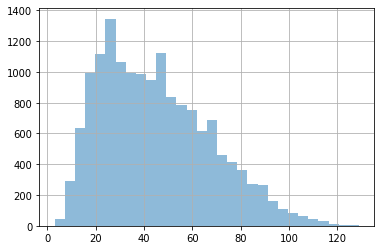

In [10]:
import matplotlib.pyplot as plt
# Plot a histogram
train.sales.hist(bins=30, alpha=0.5)
plt.show()

## Train a simple model
As you determined, you are dealing with a regression problem. So, now you're ready to build a model for a subsequent submission. But now, instead of building the simplest Linear Regression model as in the slides, let's build an out-of-box Random Forest model.

You will use the RandomForestRegressor class from the scikit-learn library.

Your objective is to train a Random Forest model with default parameters on the "store" and "item" features.

### code

In [12]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor

# Read the train data
train = pd.read_csv(prefix+'train.csv')

# Create a Random Forest object
rf = RandomForestRegressor()

# Train a model
rf.fit(X=train[['store', 'item']], y=train['sales'])

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

## Prepare a submission
You've already built a model on the training data from the Kaggle Store Item Demand Forecasting Challenge. Now, it's time to make predictions on the test data and create a submission file in the specified format.

Your goal is to read the test data, make predictions, and save these in the format specified in the "sample_submission.csv" file. The rf object you created in the previous exercise is available in your workspace.

Note that starting from now and for the rest of the course, pandas library will be always imported for you and could be accessed as pd.

### code

In [14]:
# Read test and sample submission data
test = pd.read_csv(prefix+'test.csv')
sample_submission = pd.read_csv(prefix+'sample_submission.csv')

# Show the head() of the sample_submission
print(sample_submission.head())

   id  sales
0   0     52
1   1     52
2   2     52
3   3     52
4   4     52


In [15]:
# Read test and sample submission data
test = pd.read_csv(prefix+'test.csv')
sample_submission = pd.read_csv(prefix+'sample_submission.csv')

# Show the head() of the sample_submission
print(sample_submission.head())

# Get predictions for the test set
test['sales'] = rf.predict(test[['store', 'item']])

# Write test predictions using the sample_submission format
test[['id', 'sales']].to_csv(prefix+'kaggle_submission.csv', index=False)

   id  sales
0   0     52
1   1     52
2   2     52
3   3     52
4   4     52


# Public vs Private leaderboard


## Train XGBoost models
Every Machine Learning method could potentially overfit. You will see it on this example with XGBoost. Again, you are working with the Store Item Demand Forecasting Challenge. The train DataFrame is available in your workspace.

Firstly, let's train multiple XGBoost models with different sets of hyperparameters using XGBoost's learning API. The single hyperparameter you will change is:

max_depth - maximum depth of a tree. Increasing this value will make the model more complex and more likely to overfit.

### init

Passage sous linux pour XGBoost

In [1]:
###################
##### Dataframe
###################

#upload and download

from downloadfromFileIO import saveFromFileIO
""" à executer sur datacamp: (apres copie du code uploadfromdatacamp.py)
uploadToFileIO(train)
"""

tobedownloaded="""
{pandas.core.frame.DataFrame: {'train.csv': 'https://file.io/fprzud'}}
"""
prefixToc='3.1'
prefix = saveFromFileIO(tobedownloaded, prefixToc=prefixToc, proxy="10.225.92.1:80")

#initialisation

import pandas as pd
train = pd.read_csv(prefix+'train.csv',index_col=0)


Téléchargements à lancer
{'pandas.core.frame.DataFrame': {'train.csv': 'https://file.io/fprzud'}}
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  458k    0  458k    0     0   240k      0 --:--:--  0:00:01 --:--:--  240k



### code

In [5]:
import xgboost as xgb

# Create DMatrix on train data
dtrain = xgb.DMatrix(data=train[['store', 'item']],
                     label=train['sales'])

# Define xgboost parameters
params = {'objective': 'reg:linear',
          'max_depth': 2,
          'silent': 1}

# Train xgboost model
xg_depth_2 = xgb.train(params=params, dtrain=dtrain)

In [6]:
import xgboost as xgb

# Create DMatrix on train data
dtrain = xgb.DMatrix(data=train[['store', 'item']],
                     label=train['sales'])

# Define xgboost parameters
params = {'objective': 'reg:linear',
          'max_depth': 8,
          'silent': 1}

# Train xgboost model
xg_depth_8 = xgb.train(params=params, dtrain=dtrain)

In [7]:
import xgboost as xgb

# Create DMatrix on train data
dtrain = xgb.DMatrix(data=train[['store', 'item']],
                     label=train['sales'])

# Define xgboost parameters
params = {'objective': 'reg:linear',
          'max_depth': 15,
          'silent': 1}

# Train xgboost model
xg_depth_15 = xgb.train(params=params, dtrain=dtrain)

## Explore overfitting XGBoost
Having trained 3 XGBoost models with different maximum depths, you will now evaluate their quality. For this purpose, you will measure the quality of each model on both the train data and the test data. As you know by now, the train data is the data models have been trained on. The test data is the next month sales data that models have never seen before.

The goal of this exercise is to determine whether any of the models trained is overfitting. To measure the quality of the models you will use Mean Squared Error (MSE). It's available in sklearn.metrics as mean_squared_error() function that takes two arguments: true values and predicted values.

train and test DataFrames together with 3 models trained (xg_depth_2, xg_depth_8, xg_depth_15) are available in your workspace.

### init

In [8]:
###################
##### Dataframe
###################

#upload and download

from downloadfromFileIO import saveFromFileIO
""" à executer sur datacamp: (apres copie du code uploadfromdatacamp.py)
uploadToFileIO(test)
"""

tobedownloaded="""
{pandas.core.frame.DataFrame: {'test.csv': 'https://file.io/tcoE5V'}}
"""
prefixToc='3.2'
prefix = saveFromFileIO(tobedownloaded, prefixToc=prefixToc, proxy="10.225.92.1:80")

#initialisation

import pandas as pd
test = pd.read_csv(prefix+'test.csv',index_col=0)


Téléchargements à lancer
{'pandas.core.frame.DataFrame': {'test.csv': 'https://file.io/tcoE5V'}}
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  472k    0  472k    0     0   236k      0 --:--:--  0:00:02 --:--:--  236k



### code

In [9]:
from sklearn.metrics import mean_squared_error

dtrain = xgb.DMatrix(data=train[['store', 'item']])
dtest = xgb.DMatrix(data=test[['store', 'item']])

# For each of 3 trained models
for model in [xg_depth_2, xg_depth_8, xg_depth_15]:
    # Make predictions
    train_pred = model.predict(dtrain)     
    test_pred = model.predict(dtest)          
    
    # Calculate metrics
    mse_train = mean_squared_error(train['sales'], train_pred)                  
    mse_test = mean_squared_error(test['sales'], test_pred)
    print('MSE Train: {:.3f}. MSE Test: {:.3f}'.format(mse_train, mse_test))

MSE Train: 631.275. MSE Test: 558.522
MSE Train: 183.771. MSE Test: 337.337
MSE Train: 134.984. MSE Test: 355.534
